In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
# load data
df =pd.read_csv('breastcancer.csv')
df.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


## Exploratory Data Analysis 

In [21]:
# To check any NaN feature
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
# To delete the last column which is all NaN
df.drop(df.columns[32], axis=1, inplace = True)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [23]:
# Size of the dataset
df.shape

(569, 32)

In [24]:
# Target values in the dataset
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

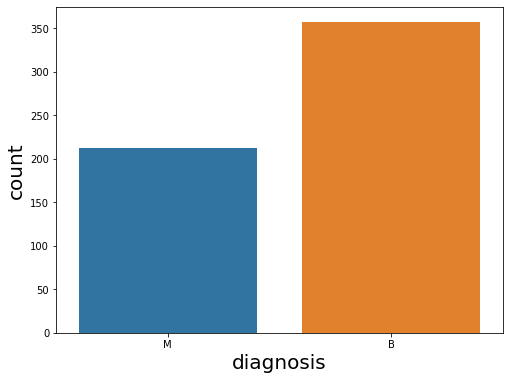

In [25]:
# See the distribution of target values in the dataset
plt.figure(figsize=(8,6))
sns.countplot('diagnosis', data = df)
plt.xlabel('diagnosis', fontsize = 20)
plt.ylabel('count', fontsize =20)
plt.show()

In [26]:
# To convert the target values into categorical 
le = LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis.astype('str'))
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [27]:
# Double check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int32  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
# To check any NaN value in the dataset
df.isna().sum().value_counts()

0    32
dtype: int64

In [29]:
# Statistics about the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [30]:
X = df.iloc[:,2:]
y = df.diagnosis
X.shape, y.shape, X.columns

((569, 30),
 (569,),
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'))

## Modelling

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=87)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [32]:
np.random.seed(155)
my_first_nn = Sequential()
my_first_nn.add(Dense(20, input_dim= 30, activation = 'relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])
my_first_nn_fitted = my_first_nn.fit(X_train, y_train, epochs = 100,  initial_epoch = 0)

Epoch 1/100
14/14 [==============================] - 0s 2ms/step - loss: 147.6640 - accuracy: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 91.2057 - accuracy: 0.6197
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 32.4078 - accuracy: 0.6103
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 10.4808 - accuracy: 0.3404
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 5.3145 - accuracy: 0.3685
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 1.5003 - accuracy: 0.4953
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7887
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8662
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8662
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.8897
Epoc

Epoch 83/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9155
Epoch 84/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1501 - accuracy: 0.9366
Epoch 85/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9131
Epoch 86/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.9366
Epoch 87/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9390
Epoch 88/100
14/14 [==============================] - 0s 1ms/step - loss: 0.1554 - accuracy: 0.9343
Epoch 89/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1513 - accuracy: 0.9343
Epoch 90/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9366
Epoch 91/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9296
Epoch 92/100
14/14 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9413


In [33]:
print(my_first_nn.summary())
loss, acc = my_first_nn.evaluate(X_test, y_test, verbose = 0)
print("The Test loss is: ", loss)
print("The Test accuracy is: ", acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
The Test loss is:  0.2505124509334564
The Test accuracy is:  0.9160839319229126


## Model Details

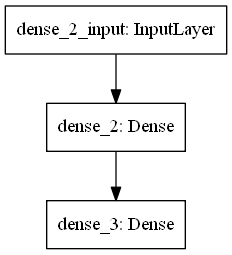

In [34]:
from tensorflow import keras
keras.utils.plot_model(my_first_nn, 'model.png')

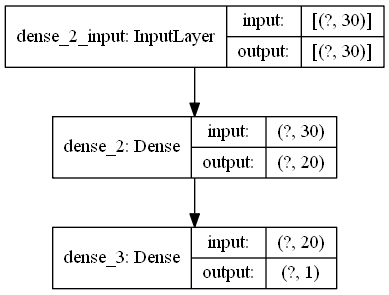

In [35]:
keras.utils.plot_model(my_first_nn, 'model_shapes.png', show_shapes=True)